# Lung Capacity Analysis

Import Library

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Import the dataset into Python environment

In [150]:
df_lung = pd.read_excel('LungCap Dataset.xls')

# 2. Understand the structure of dataset

In [151]:
df_lung.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [152]:
df_lung.describe()

,LungCap(cc),Age( years),Height(inches)
count,725.000000,725.000000,725.000000
mean,7.863148,12.326897,64.836276
std,2.662008,4.004750,7.202144
min,0.507000,3.000000,45.300000
25%,6.150000,9.000000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.800000,15.000000,70.300000
max,14.675000,19.000000,81.800000


In [153]:
df_lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
LungCap(cc)       725 non-null float64
Age( years)       725 non-null int64
Height(inches)    725 non-null float64
Smoke             725 non-null object
Gender            725 non-null object
Caesarean         725 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [154]:
df_lung.columns

Index(['LungCap(cc)', 'Age( years)', 'Height(inches)', 'Smoke', 'Gender',
       'Caesarean'],
      dtype='object')

In [155]:
df_lung.rename(columns={'LungCap(cc)':'Lungcap','Age( years)':'Age','Height(inches)':'Height'},inplace=True)

In [156]:
df_lung.columns

Index(['Lungcap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [157]:
df_lung.shape

(725, 6)

In [419]:
df_lung.corr()

,Lungcap,Age,Height
Lungcap,1.000000,0.819675,0.912187
Age,0.819675,1.000000,0.835737
Height,0.912187,0.835737,1.000000


In [420]:
df_lung.skew()

Lungcap   -0.227873
Age       -0.257944
Height    -0.226494
dtype: float64

In [421]:
df_lung.kurt()

Lungcap   -0.312406
Age       -0.697093
Height    -0.499582
dtype: float64

# 3. Graphical exploration of dataset

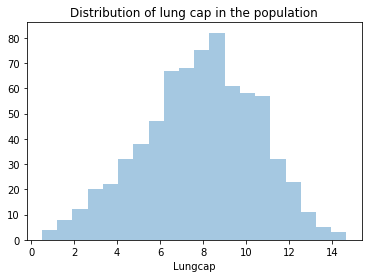

In [177]:
#To check the univariate distribution of lung cap in the dataset
sns.distplot(df_lung['Lungcap'],kde=False,bins=20)
plt.title('Distribution of lung cap in the population')
plt.show()

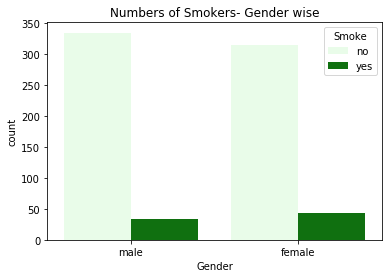

In [215]:
#To check number of smoker gender wise against the population

sns.countplot(x='Gender',hue='Smoke', data=df_lung, color='green')
plt.title('Numbers of Smokers- Gender wise')
plt.show()

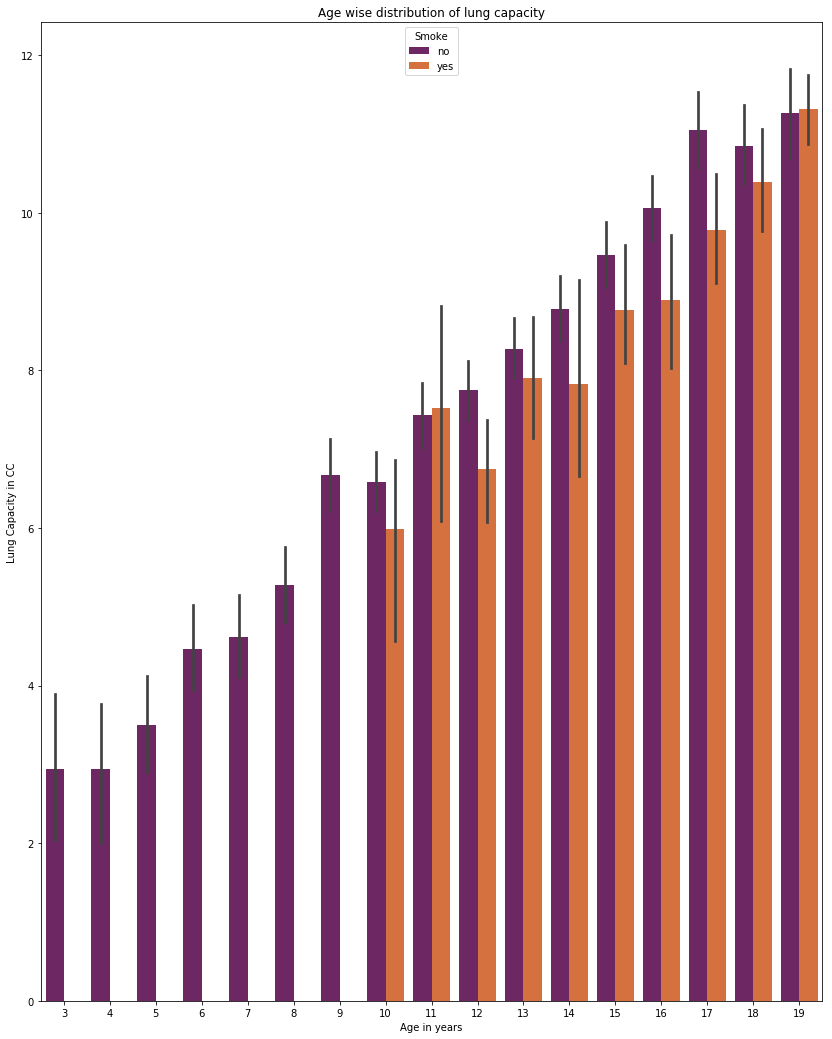

In [212]:
#To determine the agewise distribution of lung cap for smokers and non-smokers

f,ax=plt.subplots(figsize=(14,18))
sns.barplot(x='Age',y='Lungcap',hue='Smoke',data=df_lung,palette='inferno')
plt.title('Age wise distribution of lung capacity')
plt.xlabel('Age in years')
plt.ylabel('Lung Capacity in CC')
plt.show()

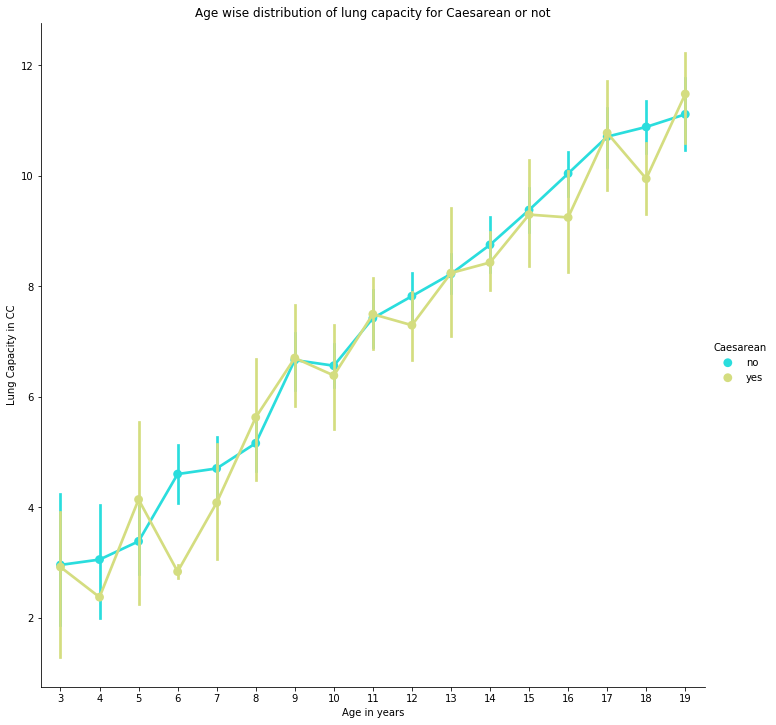

In [218]:
#To determine the agewise distribution of lung cap for Caesarean or not

sns.factorplot("Age","Lungcap",data=df_lung,hue="Caesarean",palette='rainbow',height=10);
plt.title('Age wise distribution of lung capacity for Caesarean or not')
plt.xlabel('Age in years')
plt.ylabel('Lung Capacity in CC')
plt.show()

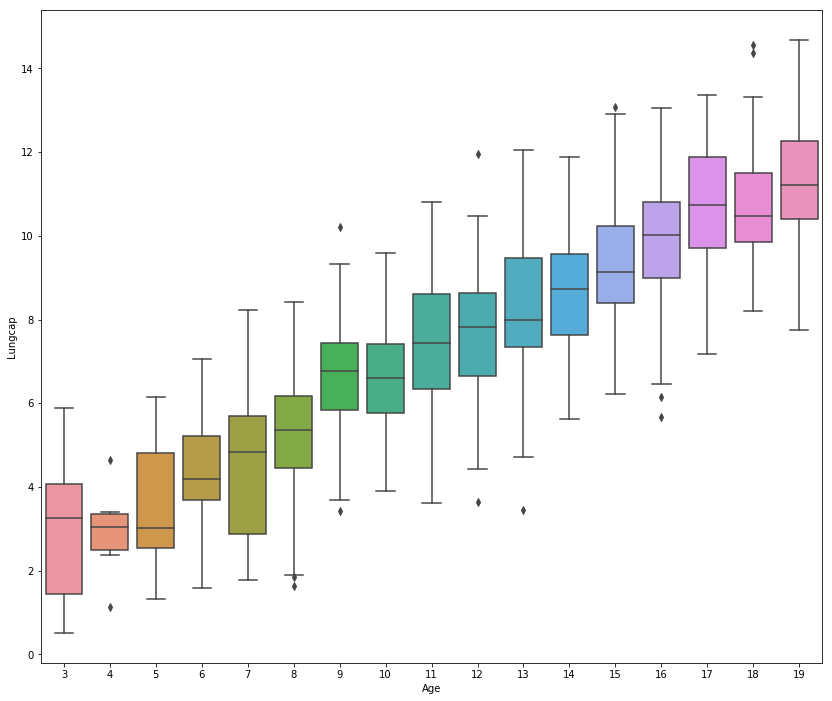

In [171]:
f,x=plt.subplots(figsize=(14,12))
fig=sns.boxplot(df_lung['Age'],df_lung['Lungcap'])
plt.show()

# 4. Descriptive statistics about the dataset

1. The lung capacity of Smoker vs Non-Smokers

In [406]:
# As we know from the bar graph that people starts smoking only after the age of 10,
# so to get better understanding of fluctuation we will compare adults only from the age of 10

df_adult=df_lung[df_lung['Age']>9] 

df_smoke=df_adult.groupby('Smoke').mean()['Lungcap']
df_smoke

Smoke
no     8.891524
yes    8.645455
Name: Lungcap, dtype: float64

In [408]:
diff_smoke=df_smoke[0]-df_smoke[1]

print('The average difference between the lung capacity of smoker and non-smoker is ',round(diff_smoke,3))

The average difference between the lung capacity of smoker and non-smoker is  0.246


2. The susceptiblity towards smoking based on sample population provided

In [409]:
#Male and female smokers percentage in the population

smogen=df_adult.groupby(['Smoke','Gender']).count()['Age'] #we use adult dataset to get more accurate figures

permale= (smogen[2]/(smogen[0]+smogen[2]))*100
perfem= (smogen[3]/(smogen[1]+smogen[3]))*100


print('In the given population: \n ',round(permale,2),' % of males are smokers' )
print('and ',round(perfem,2),' % of females are smoker' )

In the given population: 
  16.24  % of males are smokers
and  12.13  % of females are smoker


In [411]:
#Age-wise smoker percentage in population

smoage=df_lung.groupby(['Smoke','Age']).count()['Lungcap']
arr1=np.arange(10,20)
nosmo=[]
nosmo.append(round(((smoage['yes'][arr1]/(smoage['no'][arr1]+smoage['yes'][arr1]))*100),2))
nosmo

[Age
 10     7.84
 11    13.79
 12    10.29
 13    11.59
 14    10.71
 15    14.06
 16    16.67
 17    25.58
 18    30.23
 19     5.41
 Name: Lungcap, dtype: float64]

In [392]:
print('With ',max(nosmo[0]), '%, the most succeptile age is 18 year old')

With  30.23 %, the most succeptile age is 18 year old


3. Age that is highly affected by smoking

In [365]:
smoage=df_lung.groupby(['Smoke','Age']).mean()['Lungcap']
smoage

Smoke  Age
no     3       2.946692
       4       2.941667
       5       3.498750
       6       4.461000
       7       4.620270
       8       5.274390
       9       6.674375
       10      6.586170
       11      7.432500
       12      7.747131
       13      8.270082
       14      8.778500
       15      9.466364
       16     10.057778
       17     11.049219
       18     10.847500
       19     11.258571
yes    10      5.981250
       11      7.515625
       12      6.746429
       13      7.896875
       14      7.829167
       15      8.766667
       16      8.897222
       17      9.781818
       18     10.390385
       19     11.312500
Name: Lungcap, dtype: float64

In [352]:
#Diffrence in lung capacity for smokers and non-smokers

arr1=np.arange(10,20)
nosmo=[]
nosmo.append(smoage['no'][arr1]-smoage['yes'][arr1])

nosmoarr=np.array(nosmo)
nosmoarr=nosmoarr.reshape(10)

df_diff= pd.DataFrame({'Age':arr1,'Diff Luncap':nosmoarr})  
df_diff

,Age,Diff Luncap
0,10,0.604920
1,11,-0.083125
2,12,1.000703
3,13,0.373207
4,14,0.949333
5,15,0.699697
6,16,1.160556
7,17,1.267401
8,18,0.457115
9,19,-0.053929


In [359]:
print('The inference from above analysis shows that smoking highly affect the lung capacity for')
maxval=df_diff['Diff Luncap'].max()
df_max_diff=df_diff[df_diff['Diff Luncap']==maxval]
print(df_max_diff)

The inference from above analysis shows that smoking highly affect the lung capacity for
   Age  Diff Luncap
7   17     1.267401


4. To find out effect of lung capacity for Caesarean with respect to smoking and non-smoking

In [435]:
#To find out necessity of Caesarean 

gensmocae=df_adult.groupby(['Gender','Caesarean','Smoke']).mean()['Lungcap'] #We use adult dataset for more accurate readings
gensmocae

Gender  Caesarean  Smoke
female  no         no       8.415028
                   yes      8.203030
        yes        no       8.405612
                   yes      8.011364
male    no         no       9.391806
                   yes      9.529348
        yes        no       9.206356
                   yes      8.770000
Name: Lungcap, dtype: float64

In [438]:
print('The difference in lung capacity for male/female Caesarean between non smoker and smoker')

print('Female Non Caesarean: \t',round(gensmocae[0]-gensmocae[1],3))
print('Female Caesarean: \t',round(gensmocae[2]-gensmocae[3],3))
print('Male Non Caesarean: \t',round(gensmocae[4]-gensmocae[5],3))
print('Male Caesarean: \t',round(gensmocae[6]-gensmocae[7],3))

The difference in lung capacity for male/female Caesarean between non smoker and smoker
Female Non Caesarean: 	 0.212
Female Caesarean: 	 0.394
Male Non Caesarean: 	 -0.138
Male Caesarean: 	 0.436


In [439]:
print('\n Non Caesarean male are least affected by smoking with respect to lung capacity')
print('Caesarean male is highly affected by smoking')


 Non Caesarean male are least affected by smoking with respect to lung capacity
Caesarean male is highly affected by smoking


5. Affect of height on lung capacity for smokers and non smokers

In [418]:
df_adult.groupby('Smoke').mean()

,Lungcap,Age,Height
Smoke,,,
no,8.891524,14.032189,67.487768
yes,8.645455,14.779221,68.522078


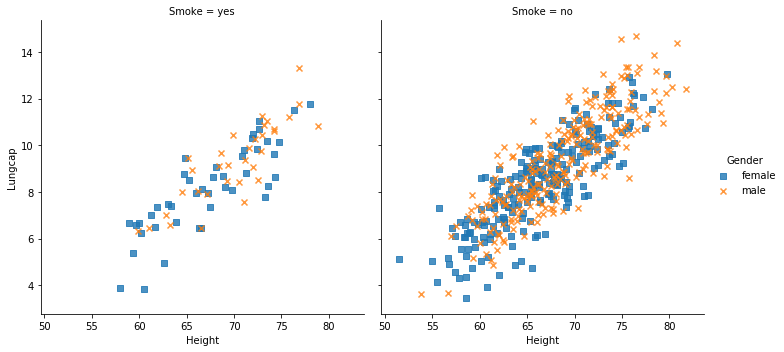

In [413]:
#To detemine the relation between lung cap and height with respect to gender

sns.lmplot(x='Height',y='Lungcap',hue='Gender',col='Smoke',data=df_adult, scatter=True,fit_reg=False,markers=['s','x'])
plt.show()

In [396]:
print('Height and Lungcap are direclty propotional')

Height and Lungcap are direclty propotional


# 5. Insights from the dataset

1. People start smoking at the age of 10 and after that the lung capacity is different for smoker and non-smoker, the average difference in lung capacity is 0.246 CC 
2. Male is more susceptible to smoke than women
3. 18 year old is highly susceptible to smoke than any other age.
4. Smoking cause different level of affect on different ages in their lung capacity. The highly affected is 17 year old with the lung capacity difference between non-smoker and smoker of 1.267 CC which is way above average, with second most affected age as 16 year old with 1.16 CC difference
5. Non-Caesarean male are least affected by the effect of smoking on lung capacity while Caesarean male are highly affected
6. Height and lung cap are in a linear relationship

# END